In [8]:
%matplotlib inline

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Linear regression
### Car fuel consumption prediction

In [12]:
mpg_data = pd.read_fwf("auto_mpg_data/auto-mpg.data", header = None)

In [13]:
mpg_data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [14]:
mpg_data.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

In [15]:
mpg_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [16]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [17]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
mpg_data[mpg_data.horsepower == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [19]:
mpg_data[mpg_data.horsepower == "?"].index

Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [20]:
mpg_data = mpg_data.drop(mpg_data[mpg_data.horsepower == "?"].index)

In [21]:
mpg_data.horsepower = mpg_data.horsepower.astype(float)

In [22]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [23]:
mpg_data.shape

(392, 9)

In [25]:
mpg_data = mpg_data.drop("car name", axis = 1)

In [26]:
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [27]:
mpg_data_attributes = mpg_data.drop("mpg", axis = 1)

In [28]:
mpg_data_target = mpg_data["mpg"]

In [29]:
mpg_data_target

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [31]:
mpg_data_attributes_scaled = MinMaxScaler().fit_transform(mpg_data_attributes)

In [35]:
mpg_data_attributes_scaled.min(axis = 0), mpg_data_attributes_scaled.max(axis = 0)

(array([0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1.]))

In [36]:
linear_regression = LinearRegression()

In [37]:
linear_regression.fit(mpg_data_attributes_scaled, mpg_data_target)

LinearRegression()

In [38]:
linear_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.8214780764810597

In [39]:
l2_regression = Ridge()

In [41]:
l2_regression.fit(mpg_data_attributes_scaled, mpg_data_target)
l2_regression.score(mpg_data_attributes_scaled,  mpg_data_target)

0.8164896635931875

In [42]:
l1_regression = Lasso()
l1_regression.fit(mpg_data_attributes_scaled, mpg_data_target)

Lasso()

In [43]:
l1_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.485423587067617

In [45]:
mpg_data_attributes_scaled_train, mpg_data_attributes_scaled_test, mpg_data_target_train, mpg_data_target_test = train_test_split(mpg_data_attributes_scaled, mpg_data_target, train_size = 0.7)

In [46]:
mpg_data_attributes_scaled_train.shape, mpg_data_attributes_scaled_test.shape

((274, 7), (118, 7))

In [47]:
mpg_data_target_train.shape, mpg_data_target_test.shape

((274,), (118,))

In [48]:
linear_regresssion = LinearRegression()
linear_regresssion.fit(mpg_data_attributes_scaled_train, mpg_data_target_train)

LinearRegression()

In [49]:
linear_regression.score(mpg_data_attributes_scaled_test, mpg_data_target_test)

0.8370119472942469

In [50]:
linear_regression.score(mpg_data_attributes_scaled_train, mpg_data_target_train)

0.8149322444754736

In [51]:
predicted_mpgs = linear_regression.predict(mpg_data_attributes_scaled_test)

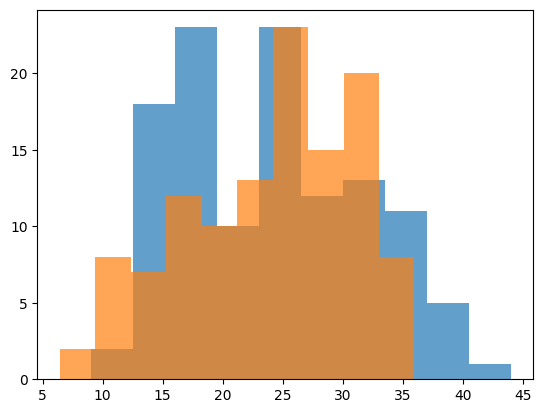

In [54]:
plt.hist(mpg_data_target_test, alpha = 0.7)
plt.hist(predicted_mpgs, alpha = 0.7)
plt.show()

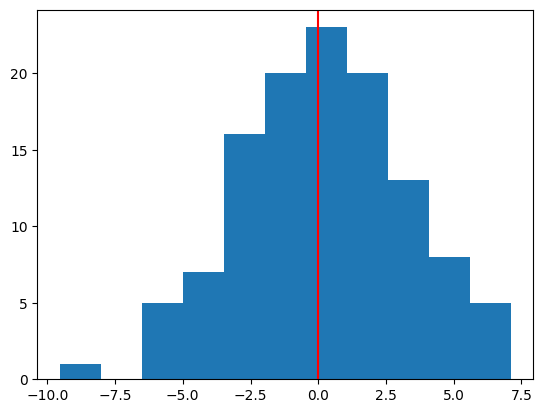

In [56]:
plt.hist(predicted_mpgs - mpg_data_target_test, bins = "fd")
plt.axvline([0], c = "r")
plt.show()

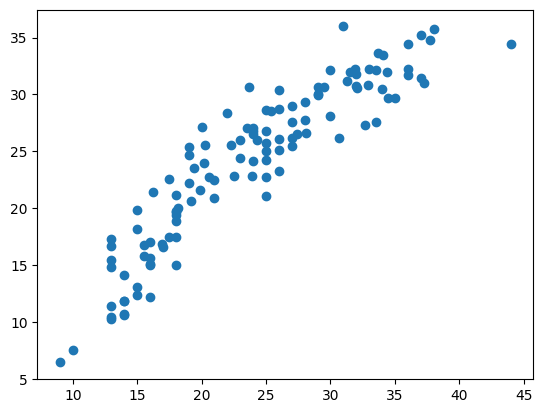

In [57]:
plt.scatter(mpg_data_target_test, predicted_mpgs)

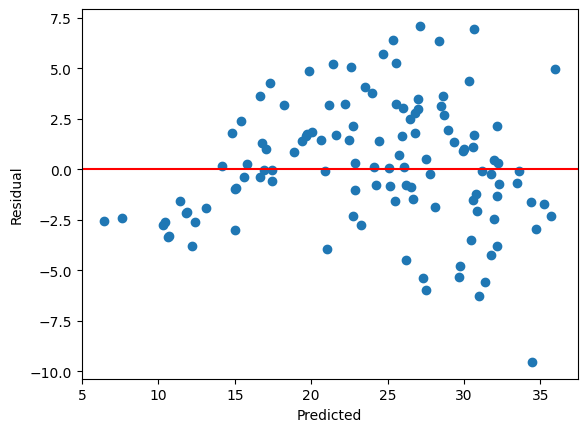

In [60]:
plt.scatter(predicted_mpgs, predicted_mpgs - mpg_data_target_test)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline([0], c = "r")